In [2]:
import networkx
import pandas as pd

In [10]:
url="https://snap.stanford.edu/data/twitch.zip"
!curl -O https://snap.stanford.edu/data/twitch.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2776k  100 2776k    0     0  1099k      0  0:00:02  0:00:02 --:--:-- 1099k


In [11]:
!unzip twitch.zip

Archive:  twitch.zip
   creating: twitch/
   creating: twitch/DE/
  inflating: twitch/DE/musae_DE.json  
  inflating: twitch/DE/musae_DE_edges.csv  
  inflating: twitch/DE/musae_DE_target.csv  
   creating: twitch/ENGB/
  inflating: twitch/ENGB/musae_ENGB_edges.csv  
  inflating: twitch/ENGB/musae_ENGB_features.json  
  inflating: twitch/ENGB/musae_ENGB_target.csv  
   creating: twitch/ES/
  inflating: twitch/ES/musae_ES_edges.csv  
  inflating: twitch/ES/musae_ES_features.json  
  inflating: twitch/ES/musae_ES_target.csv  
   creating: twitch/FR/
  inflating: twitch/FR/musae_FR_edges.csv  
  inflating: twitch/FR/musae_FR_features.json  
  inflating: twitch/FR/musae_FR_target.csv  
   creating: twitch/PTBR/
  inflating: twitch/PTBR/musae_PTBR_edges.csv  
  inflating: twitch/PTBR/musae_PTBR_features.json  
  inflating: twitch/PTBR/musae_PTBR_target.csv  
   creating: twitch/RU/
  inflating: twitch/RU/musae_RU_edges.csv  
  inflating: twitch/RU/musae_RU_features.json  
  inflating: twitc

In [12]:
GRAPH_DIR = "twitch/DE"

In [59]:
edges = pd.read_csv(GRAPH_DIR + "/musae_DE_edges.csv")

In [48]:
edges.max()

from    9488
to      9497
dtype: int64

In [14]:
edges

,from,to
0,0,9206
1,0,7787
2,0,2145
3,0,2684
4,0,7275
...,...,...
153133,2547,2092
153134,9461,2092
153135,9295,7802
153136,7436,9487


In [60]:
nodes = pd.read_csv(GRAPH_DIR + "/musae_DE_target.csv", index_col='new_id')

In [50]:
nodes.loc[nodes["new_id"] == 9498]

,id,days,mature,views,partner,new_id


In [57]:
res = nodes["new_id"].sort_values() == nodes.index.sort_values()   ## ? to do sprawdzenia i ew inaczej wczytać
res.all()

True

In [62]:
nodes

,id,days,mature,views,partner
new_id,,,,,
5079,37905227,2149,True,162078,False
4281,63102384,1574,True,1370,False
992,109414094,1034,True,6043,False
9021,84163849,1319,True,94298,True
330,38240837,2137,True,2323,False
...,...,...,...,...,...
4572,123101102,895,True,128,False
6355,40627165,2001,False,44,False
206,50643307,1784,True,2038,False


In [17]:
import networkx as nx

In [63]:
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(edges, source='from', target='to', create_using=Graphtype)

In [75]:
nx.draw(G, node_size=10)  

## Implemetation of SIR model using EoN python library

In [23]:
import EoN as eon
import matplotlib.pyplot as plt
%matplotlib notebook 

In [96]:
# set consts
tmax = 20
iterations = 5
tau = 0.1     #transmission rate
gamma = 1.0   #recovery rate
rho = 0.001   #random fraction initially infected

In [ ]:
# simulate with above set parameters  --- wszystkie wykresy na sublotach (R(t), S(t), I(t))

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(9.5, 6.5)

axs[0,0].set_title("Infected in time --- mutliple simulations")
axs[0,0].set_xlabel("t")
axs[0,0].set_ylabel("# Infected")

axs[0,1].set_title("Recovered in time --- mutliple simulations")
axs[0,1].set_xlabel("t")
axs[0,1].set_ylabel("# Recovered")

axs[1,0].set_title("Susceptible in time --- mutliple simulations")
axs[1,0].set_xlabel("t")
axs[1,0].set_ylabel("# Susceptible")


for counter in range(iterations): 
    t, S, I, R = eon.Gillespie_SIR(G, tau, gamma, rho=rho, tmax = tmax)
    if counter == 0:
        axs[0,0].plot(t, I, color = 'b', alpha=0.8, label='Simulation')  # these are first simulations
        axs[0,1].plot(t, R, color = 'b', alpha=0.8, label='Simulation')
        axs[1,0].plot(t, S, color = 'b', alpha=0.8, label='Simulation')
    axs[0,0].plot(t, I, color = 'g', alpha=0.3)
    axs[0,1].plot(t, R, color = 'g', alpha=0.3)
    axs[1,0].plot(t, S, color = 'g', alpha=0.3)
plt.show()
#plt.close()

### Same simulation but with visualization on an exemplary graph (the smaller one than above)

<IPython.core.display.Javascript object>


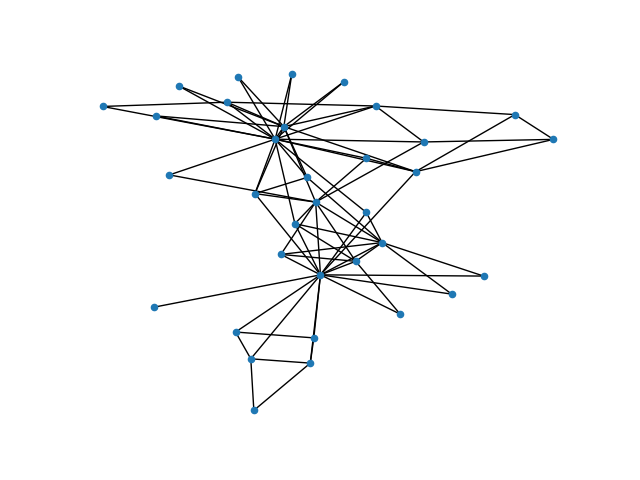

In [128]:
## we're using karate club graph for the sake of nice visualization
fig2 = plt.figure(4)
karate = nx.karate_club_graph()
nx.draw(karate, node_size = 20, ax=fig2.gca())
plt.show()

In [129]:
tau = 0.3  ## greater tau so that the animation is better
f_data = eon.Gillespie_SIR(karate, tau, gamma, tmax = tmax, return_full_data=True)

In [ ]:
## snapshot in 1/4 of the epidemy duration 
f_data.display(5)  

In [ ]:
times, states = f_data.summary()
for i in range(len(times)):
    print(f"at {times[i]:.3f} there were S: {states['S'][i]}; R: {states['R'][i]}; I: {states['I'][i]}")

<IPython.core.display.Javascript object>


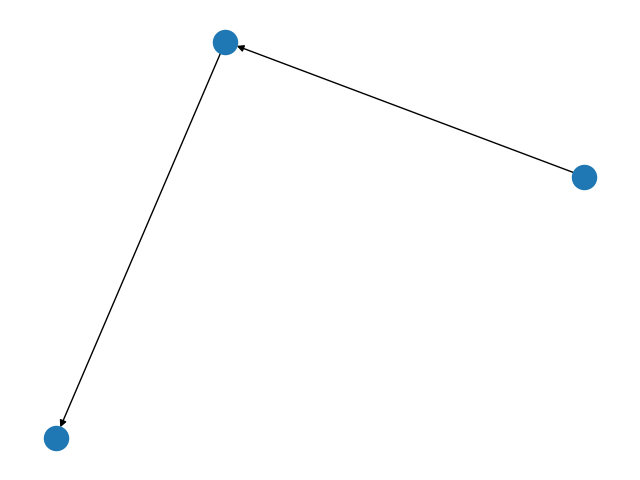

In [130]:

fig10 = plt.figure(10)
nx.draw(f_data.transmission_tree())

In [ ]:
## animation of the disease spread
f_data.animate()